In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

#carga los datos
personas = pd.read_csv('Data/BNK_FCT_PERSONA.csv', sep = ";")

#visualizamos los datos
personas

c:\Users\marti\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3221: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID_CLIENTE,FECHA_ULT_RENTA,RENTA,EDAD,FLAG_FALLECIDO,ID_GENERO,FLAG_RESIDE,FLAG_EXTRANJERO,ID_TIPO_DOMICILIO,ID_REGION_RESIDE,ID_PAIS_RESIDE,FECHA_NACIMIENTO,FECHA_FALLECIMIENTO,NOMBRE,APELLIDO1,APELLIDO2,NUM_RUT,DV_RUT,FECHA_DATO,FECHA_PROCESO
0,999,NaN,20943.00,70.0,N,M,S,N,1.0,28.0,CL,1946-05-02,1900-01-01,Alonso Gonzalo,Beltrán,Peña,100000998,5,2016-05-28,2016-05-27 22:50:38
1,1000,NaN,25682.00,42.0,N,M,S,N,1.0,28.0,CL,1974-05-23,1900-01-01,Jorge Mauricio,Troncoso,Román,100000999,3,2016-05-28,2016-05-27 22:50:38
2,1001,NaN,192363.54,77.0,N,M,S,N,1.0,28.0,CL,1939-05-15,1900-01-01,Rodrigo Jaime,Azócar,Catalán,100001000,2,2016-05-28,2016-05-27 22:50:38
3,1002,NaN,409333.94,80.0,N,M,S,N,1.0,28.0,CL,1936-05-24,1900-01-01,José Carlos,Vásquez,González,100001001,0,2016-05-28,2016-05-27 22:50:38
4,1003,NaN,108726.71,36.0,N,M,S,N,1.0,28.0,CL,1980-05-14,1900-01-01,Miguel Jorge,Miranda,Marín,100001002,9,2016-05-28,2016-05-27 22:50:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693491,5694490,NaN,204678.51,38.0,N,F,S,N,1.0,15.0,CL,1978-05-14,1900-01-01,Tamara Martina,Ríos,Parra,105694489,K,2016-05-28,2016-05-27 22:50:38
5693492,5694491,NaN,31746.58,20.0,N,F,S,N,1.0,15.0,CL,1996-05-18,1900-01-01,Alexandra Macarena,Peña,Alarcón,105694490,3,2016-05-28,2016-05-27 22:50:38
5693493,5694492,NaN,302661.92,22.0,N,F,S,N,1.0,15.0,CL,1994-05-27,1900-01-01,Leonor Florencia,Cortés,Barra,105694491,1,2016-05-28,2016-05-27 22:50:38
5693494,5694493,NaN,52628.60,19.0,N,F,S,N,1.0,15.0,CL,1997-05-23,1900-01-01,Liliana Antonia,Blanco,Pereira,105694492,K,2016-05-28,2016-05-27 22:50:38


In [2]:
#Vemos si existen datos no Nan para la columna FECHA_ULT_RENTA
alltrue = personas["FECHA_ULT_RENTA"].isnull()

alltrue.where(alltrue=="True").dropna()

#como todos son NAN simplemente eliminamos la columna

personas.drop(['FECHA_ULT_RENTA'], axis=1, inplace=True)

In [3]:
##analicemos la columna de tag fallecidos 
personas["FLAG_FALLECIDO"] = personas["FLAG_FALLECIDO"].replace({"N": 0, "S": 1})

##comprobamos que los clientes esta vivos

personas["FLAG_FALLECIDO"].sum()

##obtenemos 2730 cliente fallecidos

personas.drop(personas[personas["FLAG_FALLECIDO"] == 1].index, inplace=True)

##como ya sabemos que todos los usuarios estan vivos podemos eliminar la columna ya que no es significativa

personas.drop(["FLAG_FALLECIDO"], axis=1, inplace=True)

##Como no han fallecido no necesitamos la columna fecha_fallecimiento

personas.drop(["FECHA_FALLECIMIENTO"], axis=1, inplace=True)

personas

,ID_CLIENTE,RENTA,EDAD,ID_GENERO,FLAG_RESIDE,FLAG_EXTRANJERO,ID_TIPO_DOMICILIO,ID_REGION_RESIDE,ID_PAIS_RESIDE,FECHA_NACIMIENTO,NOMBRE,APELLIDO1,APELLIDO2,NUM_RUT,DV_RUT,FECHA_DATO,FECHA_PROCESO
0,999,20943.00,70.0,M,S,N,1.0,28.0,CL,1946-05-02,Alonso Gonzalo,Beltrán,Peña,100000998,5,2016-05-28,2016-05-27 22:50:38
1,1000,25682.00,42.0,M,S,N,1.0,28.0,CL,1974-05-23,Jorge Mauricio,Troncoso,Román,100000999,3,2016-05-28,2016-05-27 22:50:38
2,1001,192363.54,77.0,M,S,N,1.0,28.0,CL,1939-05-15,Rodrigo Jaime,Azócar,Catalán,100001000,2,2016-05-28,2016-05-27 22:50:38
3,1002,409333.94,80.0,M,S,N,1.0,28.0,CL,1936-05-24,José Carlos,Vásquez,González,100001001,0,2016-05-28,2016-05-27 22:50:38
4,1003,108726.71,36.0,M,S,N,1.0,28.0,CL,1980-05-14,Miguel Jorge,Miranda,Marín,100001002,9,2016-05-28,2016-05-27 22:50:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693491,5694490,204678.51,38.0,F,S,N,1.0,15.0,CL,1978-05-14,Tamara Martina,Ríos,Parra,105694489,K,2016-05-28,2016-05-27 22:50:38
5693492,5694491,31746.58,20.0,F,S,N,1.0,15.0,CL,1996-05-18,Alexandra Macarena,Peña,Alarcón,105694490,3,2016-05-28,2016-05-27 22:50:38
5693493,5694492,302661.92,22.0,F,S,N,1.0,15.0,CL,1994-05-27,Leonor Florencia,Cortés,Barra,105694491,1,2016-05-28,2016-05-27 22:50:38
5693494,5694493,52628.60,19.0,F,S,N,1.0,15.0,CL,1997-05-23,Liliana Antonia,Blanco,Pereira,105694492,K,2016-05-28,2016-05-27 22:50:38


In [4]:
##cambiamos el tipo de dato para ID_GENERO para un manejo mas facil

personas["ID_GENERO"] = personas["ID_GENERO"].replace({"M": 0, "F": 1})

In [5]:
##cambiamos el tipo de dato para FLAG_EXTRANJERO para un manejo mas facil

personas["FLAG_EXTRANJERO"] = personas["FLAG_EXTRANJERO"].replace({"N": 0, "S": 1})

In [6]:
##cambiamos el tipo de dato para FLAG_RESIDE para un manejo mas facil

personas["FLAG_RESIDE"] = personas["FLAG_RESIDE"].replace({"N": 0, "S": 1})

In [7]:
personas

,ID_CLIENTE,RENTA,EDAD,ID_GENERO,FLAG_RESIDE,FLAG_EXTRANJERO,ID_TIPO_DOMICILIO,ID_REGION_RESIDE,ID_PAIS_RESIDE,FECHA_NACIMIENTO,NOMBRE,APELLIDO1,APELLIDO2,NUM_RUT,DV_RUT,FECHA_DATO,FECHA_PROCESO
0,999,20943.00,70.0,0.0,1.0,0.0,1.0,28.0,CL,1946-05-02,Alonso Gonzalo,Beltrán,Peña,100000998,5,2016-05-28,2016-05-27 22:50:38
1,1000,25682.00,42.0,0.0,1.0,0.0,1.0,28.0,CL,1974-05-23,Jorge Mauricio,Troncoso,Román,100000999,3,2016-05-28,2016-05-27 22:50:38
2,1001,192363.54,77.0,0.0,1.0,0.0,1.0,28.0,CL,1939-05-15,Rodrigo Jaime,Azócar,Catalán,100001000,2,2016-05-28,2016-05-27 22:50:38
3,1002,409333.94,80.0,0.0,1.0,0.0,1.0,28.0,CL,1936-05-24,José Carlos,Vásquez,González,100001001,0,2016-05-28,2016-05-27 22:50:38
4,1003,108726.71,36.0,0.0,1.0,0.0,1.0,28.0,CL,1980-05-14,Miguel Jorge,Miranda,Marín,100001002,9,2016-05-28,2016-05-27 22:50:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693491,5694490,204678.51,38.0,1.0,1.0,0.0,1.0,15.0,CL,1978-05-14,Tamara Martina,Ríos,Parra,105694489,K,2016-05-28,2016-05-27 22:50:38
5693492,5694491,31746.58,20.0,1.0,1.0,0.0,1.0,15.0,CL,1996-05-18,Alexandra Macarena,Peña,Alarcón,105694490,3,2016-05-28,2016-05-27 22:50:38
5693493,5694492,302661.92,22.0,1.0,1.0,0.0,1.0,15.0,CL,1994-05-27,Leonor Florencia,Cortés,Barra,105694491,1,2016-05-28,2016-05-27 22:50:38
5693494,5694493,52628.60,19.0,1.0,1.0,0.0,1.0,15.0,CL,1997-05-23,Liliana Antonia,Blanco,Pereira,105694492,K,2016-05-28,2016-05-27 22:50:38


In [8]:
#Sacamos las filas con valores nulos de genero residencia y extranjeros

personas["ID_GENERO"] = personas["ID_GENERO"].dropna()
personas["FLAG_RESIDE"] = personas["FLAG_RESIDE"].dropna()
personas["FLAG_EXTRANJERO"] = personas["FLAG_EXTRANJERO"].dropna()
personas["RENTA"] = personas["RENTA"].dropna()
personas["EDAD"] = personas["EDAD"].dropna()
personas
# 5690766

,ID_CLIENTE,RENTA,EDAD,ID_GENERO,FLAG_RESIDE,FLAG_EXTRANJERO,ID_TIPO_DOMICILIO,ID_REGION_RESIDE,ID_PAIS_RESIDE,FECHA_NACIMIENTO,NOMBRE,APELLIDO1,APELLIDO2,NUM_RUT,DV_RUT,FECHA_DATO,FECHA_PROCESO
0,999,20943.00,70.0,0.0,1.0,0.0,1.0,28.0,CL,1946-05-02,Alonso Gonzalo,Beltrán,Peña,100000998,5,2016-05-28,2016-05-27 22:50:38
1,1000,25682.00,42.0,0.0,1.0,0.0,1.0,28.0,CL,1974-05-23,Jorge Mauricio,Troncoso,Román,100000999,3,2016-05-28,2016-05-27 22:50:38
2,1001,192363.54,77.0,0.0,1.0,0.0,1.0,28.0,CL,1939-05-15,Rodrigo Jaime,Azócar,Catalán,100001000,2,2016-05-28,2016-05-27 22:50:38
3,1002,409333.94,80.0,0.0,1.0,0.0,1.0,28.0,CL,1936-05-24,José Carlos,Vásquez,González,100001001,0,2016-05-28,2016-05-27 22:50:38
4,1003,108726.71,36.0,0.0,1.0,0.0,1.0,28.0,CL,1980-05-14,Miguel Jorge,Miranda,Marín,100001002,9,2016-05-28,2016-05-27 22:50:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693491,5694490,204678.51,38.0,1.0,1.0,0.0,1.0,15.0,CL,1978-05-14,Tamara Martina,Ríos,Parra,105694489,K,2016-05-28,2016-05-27 22:50:38
5693492,5694491,31746.58,20.0,1.0,1.0,0.0,1.0,15.0,CL,1996-05-18,Alexandra Macarena,Peña,Alarcón,105694490,3,2016-05-28,2016-05-27 22:50:38
5693493,5694492,302661.92,22.0,1.0,1.0,0.0,1.0,15.0,CL,1994-05-27,Leonor Florencia,Cortés,Barra,105694491,1,2016-05-28,2016-05-27 22:50:38
5693494,5694493,52628.60,19.0,1.0,1.0,0.0,1.0,15.0,CL,1997-05-23,Liliana Antonia,Blanco,Pereira,105694492,K,2016-05-28,2016-05-27 22:50:38


In [9]:
#buscamos un rango de edad razonable
#personas = personas.where(personas["EDAD"] <=90)

#personas = personas.where(personas["EDAD"] >=15)

#personas["EDAD"].dropna()

<Axes: xlabel='EDAD'>

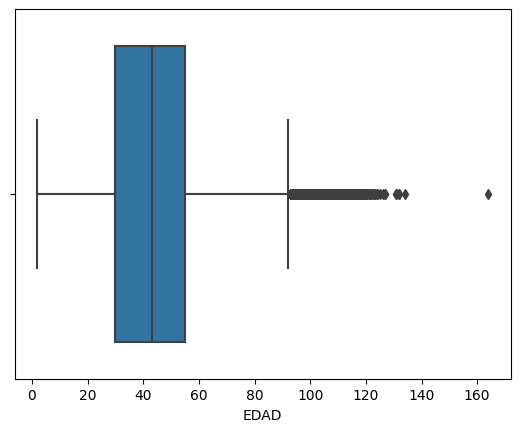

In [10]:
##Falta revisar que no haya una renta que se escape demasiado de la realidad
sns.boxplot(x = personas["EDAD"])

In [11]:
#buscamos outliers en la edad
personas["EDAD"].quantile(0.996)

91.0

<Axes: >

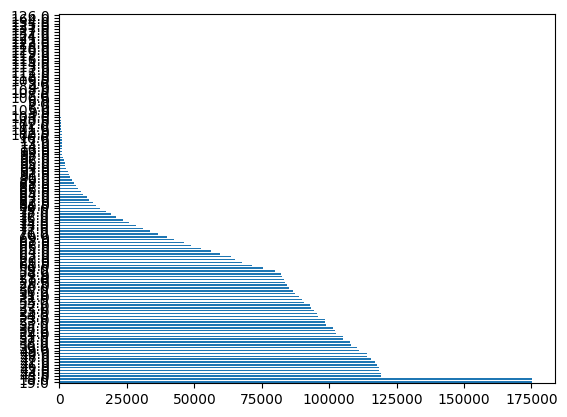

In [12]:
import matplotlib.pyplot as plt
perosans_por_edad = personas["EDAD"]
perosans_por_edad.value_counts().plot(kind='barh' )


<Axes: xlabel='RENTA'>

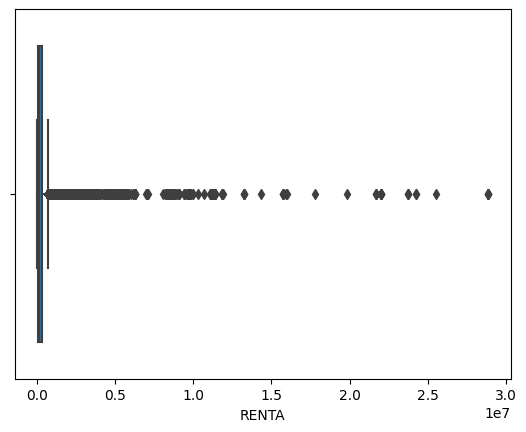

In [13]:
sns.boxplot(x = personas["RENTA"])

In [14]:
################################CLIENTES##################################

In [15]:

##import sklearn.preprocessing
clientes = pd.read_csv('Data/BNK_FCT_CLIENTE.csv', sep = ";")

#Vemos si existen datos no Nan para la columna FLAG_CONYU_EMP
alltrue = clientes["FLAG_CONYU_EMP"].isnull()

alltrue.where(alltrue=="True").dropna()

#como todos son NAN simplemente eliminamos la columna

clientes.drop(['FLAG_CONYU_EMP'], axis=1, inplace=True)

#lo mismo para la columna FECHA_ULT_CLTE_UNIP

alltrue = clientes["FECHA_ULT_CLTE_UNIP"].isnull()

alltrue.where(alltrue=="True").dropna()

#como todos son NAN simplemente eliminamos la columna

clientes.drop(['FECHA_ULT_CLTE_UNIP'], axis=1, inplace=True)

clientes.drop(['ID_CANAL'], axis=1, inplace=True)
clientes.drop(['FECHA_ALTA'], axis=1, inplace=True)
clientes.drop(['FECHA_PROCESO'], axis=1, inplace=True)

clientes = clientes.dropna()

clientes= clientes.replace('S01 - ELITE', 1)
clientes= clientes.replace('S02 - NORMAL', 2)
clientes= clientes.replace('S03 - ESTUDIANTE', 3)

clientes

#Se aplica OneHotEncoder a ID_EMPLEADO
#encoder = sklearn.preprocessing.OneHotEncoder()
#transformada = encoder.fit_transform(clientes[["ID_EMPLEADO"]])
#clientes[encoder.categories_[0]] = transformada.toarray() 
#clientes = clientes.drop(columns=["ID_EMPLEADO"])
#
#clientes.drop_duplicates()

c:\Users\marti\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3221: DtypeWarning: Columns (8,9,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID_CLIENTE,FECHA_DATO,FLAG_NUEVO_CLTE,ANTIGUEDAD,FLAG_ACTIVI,FLAG_ESTADO,ID_CODACCION,ID_ESTADO,ID_SEGMENTO_VALOR,ID_EMPLEADO
0,1375586,2015-01-28 00:00:00,0.0,6.0,1.0,1.0,1.0,0.0,2,NOEMP
1,1050611,2015-01-28 00:00:00,0.0,35.0,0.0,1.0,1.0,1.0,3,NOEMP
2,1050612,2015-01-28 00:00:00,0.0,35.0,0.0,1.0,1.0,1.0,3,NOEMP
3,1050613,2015-01-28 00:00:00,0.0,35.0,0.0,1.0,1.0,1.0,3,NOEMP
4,1050614,2015-01-28 00:00:00,0.0,35.0,1.0,1.0,1.0,0.0,3,NOEMP
...,...,...,...,...,...,...,...,...,...,...
13647303,1166766,2016-05-28 00:00:00,0.0,33.0,0.0,1.0,1,1.0,3,NOEMP
13647304,1166765,2016-05-28 00:00:00,0.0,33.0,0.0,1.0,1,1.0,3,NOEMP
13647305,1166764,2016-05-28 00:00:00,0.0,33.0,0.0,1.0,1,1.0,3,NOEMP
13647306,1166763,2016-05-28 00:00:00,0.0,33.0,1.0,1.0,1,0.0,2,NOEMP


In [16]:
clientes["ANTIGUEDAD"].max()

256.0

In [17]:
clientes[clientes["FLAG_NUEVO_CLTE"] == 1]

,ID_CLIENTE,FECHA_DATO,FLAG_NUEVO_CLTE,ANTIGUEDAD,FLAG_ACTIVI,FLAG_ESTADO,ID_CODACCION,ID_ESTADO,ID_SEGMENTO_VALOR,ID_EMPLEADO
5883,1044472,2015-01-28 00:00:00,1.0,1.0,1.0,1.0,1.0,0.0,2,NOEMP
6579,1042486,2015-01-28 00:00:00,1.0,4.0,1.0,1.0,1.0,1.0,3,NOEMP
6632,1042509,2015-01-28 00:00:00,1.0,3.0,1.0,1.0,1.0,1.0,3,NOEMP
6717,1042950,2015-01-28 00:00:00,1.0,1.0,0.0,1.0,1.0,0.0,3,NOEMP
20792,1023793,2015-01-28 00:00:00,1.0,5.0,0.0,1.0,1.0,1.0,3,NOEMP
...,...,...,...,...,...,...,...,...,...,...
13640204,1170788,2016-05-28 00:00:00,1.0,3.0,1.0,1.0,1,0.0,2,NOEMP
13642971,1172024,2016-05-28 00:00:00,1.0,4.0,1.0,1.0,1,0.0,2,NOEMP
13645001,1164053,2016-05-28 00:00:00,1.0,3.0,0.0,99.0,1,0.0,2,NOEMP
13646506,1166395,2016-05-28 00:00:00,1.0,3.0,1.0,1.0,1,0.0,1,NOEMP


In [18]:
tenencia = pd.read_csv('Data/BNK_FCT_TENENCIA.csv', sep = ";")
tenencia = tenencia.filter(['ID_CLIENTE','TARJ_CRE','FECHA_DATO', 'FECHA_PROCESO'])
tenencia.rename(columns={'ID_CLIENTE':'ID_CLIENTE_TENECIA', 'FECHA_DATO':'FECHA_DATO_TENENCIA', 'FECHA_PROCESO':'FECHA_PROCESO_TENENCIA'}, inplace = True)


In [19]:
tenencia_nuevo = tenencia[tenencia['TARJ_CRE']==1]
tenencia_nuevo

,ID_CLIENTE_TENECIA,TARJ_CRE,FECHA_DATO_TENENCIA,FECHA_PROCESO_TENENCIA
72,1050659,1,2015-01-28 00:00:00,2015-01-27 23:39:20
215,1050911,1,2015-01-28 00:00:00,2015-01-27 23:39:20
729,1051800,1,2015-01-28 00:00:00,2015-01-27 23:39:20
739,1051833,1,2015-01-28 00:00:00,2015-01-27 23:39:20
747,1051759,1,2015-01-28 00:00:00,2015-01-27 23:39:20
...,...,...,...,...
13640014,659133,1,2016-05-28 00:00:00,2016-05-27 21:32:06
13640189,1544111,1,2016-05-28 00:00:00,2016-05-27 21:32:06
13640389,1544400,1,2016-05-28 00:00:00,2016-05-27 21:32:06
13640920,1545175,1,2016-05-28 00:00:00,2016-05-27 21:32:06


In [20]:
clientes_nuevos = clientes.filter(['ID_CLIENTE','FLAG_NUEVO_CLTE'])
clientes_nuevos = clientes_nuevos[clientes_nuevos['FLAG_NUEVO_CLTE'] == 1]
clientes_nuevos

,ID_CLIENTE,FLAG_NUEVO_CLTE
5883,1044472,1.0
6579,1042486,1.0
6632,1042509,1.0
6717,1042950,1.0
20792,1023793,1.0
...,...,...
13640204,1170788,1.0
13642971,1172024,1.0
13645001,1164053,1.0
13646506,1166395,1.0


In [21]:
cliente_credito_nuevos = pd.merge(tenencia_nuevo, clientes_nuevos, left_on='ID_CLIENTE_TENECIA', right_on='ID_CLIENTE', how='left').drop('ID_CLIENTE', axis=1)
cliente_credito_nuevos.fillna(0)

,ID_CLIENTE_TENECIA,TARJ_CRE,FECHA_DATO_TENENCIA,FECHA_PROCESO_TENENCIA,FLAG_NUEVO_CLTE
0,1050659,1,2015-01-28 00:00:00,2015-01-27 23:39:20,0.0
1,1050911,1,2015-01-28 00:00:00,2015-01-27 23:39:20,0.0
2,1051800,1,2015-01-28 00:00:00,2015-01-27 23:39:20,0.0
3,1051833,1,2015-01-28 00:00:00,2015-01-27 23:39:20,0.0
4,1051759,1,2015-01-28 00:00:00,2015-01-27 23:39:20,0.0
...,...,...,...,...,...
623585,659133,1,2016-05-28 00:00:00,2016-05-27 21:32:06,0.0
623586,1544111,1,2016-05-28 00:00:00,2016-05-27 21:32:06,1.0
623587,1544400,1,2016-05-28 00:00:00,2016-05-27 21:32:06,1.0
623588,1545175,1,2016-05-28 00:00:00,2016-05-27 21:32:06,1.0


In [22]:
personas_datos_importantes = personas.filter(['ID_CLIENTE','RENTA','EDAD','ID_GENERO'])
personas_datos_importantes

,ID_CLIENTE,RENTA,EDAD,ID_GENERO
0,999,20943.00,70.0,0.0
1,1000,25682.00,42.0,0.0
2,1001,192363.54,77.0,0.0
3,1002,409333.94,80.0,0.0
4,1003,108726.71,36.0,0.0
...,...,...,...,...
5693491,5694490,204678.51,38.0,1.0
5693492,5694491,31746.58,20.0,1.0
5693493,5694492,302661.92,22.0,1.0
5693494,5694493,52628.60,19.0,1.0


In [23]:
merge_persona_cliente = pd.merge(personas_datos_importantes, cliente_credito_nuevos, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='right').drop('ID_CLIENTE', axis=1)
merge_persona_cliente['FLAG_NUEVO_CLTE'] = merge_persona_cliente['FLAG_NUEVO_CLTE'].fillna(0)
#merge_persona_cliente['RENTA'] = merge_persona_cliente['RENTA'].dropna()
merge_persona_cliente

,RENTA,EDAD,ID_GENERO,ID_CLIENTE_TENECIA,TARJ_CRE,FECHA_DATO_TENENCIA,FECHA_PROCESO_TENENCIA,FLAG_NUEVO_CLTE
0,NaN,40.0,0.0,1050659,1,2015-01-28 00:00:00,2015-01-27 23:39:20,0.0
1,50229.09,30.0,1.0,1050911,1,2015-01-28 00:00:00,2015-01-27 23:39:20,0.0
2,NaN,35.0,0.0,1051800,1,2015-01-28 00:00:00,2015-01-27 23:39:20,0.0
3,68036.19,36.0,0.0,1051833,1,2015-01-28 00:00:00,2015-01-27 23:39:20,0.0
4,27585.30,53.0,0.0,1051759,1,2015-01-28 00:00:00,2015-01-27 23:39:20,0.0
...,...,...,...,...,...,...,...,...
623585,152343.21,56.0,1.0,659133,1,2016-05-28 00:00:00,2016-05-27 21:32:06,0.0
623586,NaN,38.0,0.0,1544111,1,2016-05-28 00:00:00,2016-05-27 21:32:06,1.0
623587,NaN,65.0,0.0,1544400,1,2016-05-28 00:00:00,2016-05-27 21:32:06,1.0
623588,NaN,48.0,1.0,1545175,1,2016-05-28 00:00:00,2016-05-27 21:32:06,1.0


Text(0.5, 1.0, 'Tenencia de Tarjetas de Credito por Edad')

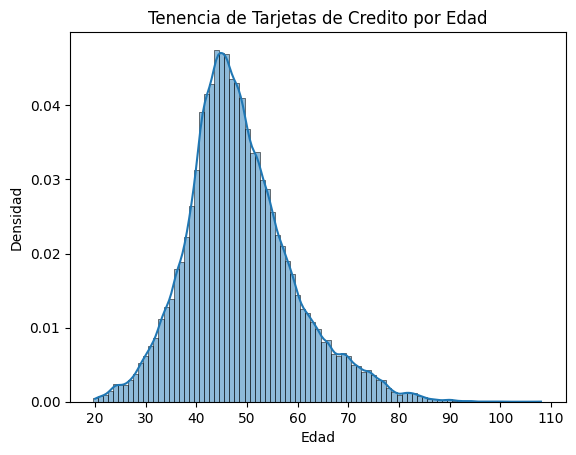

In [24]:
from matplotlib.ticker import MaxNLocator
hist = sns.histplot(data=merge_persona_cliente, x="EDAD", discrete = True, stat = 'density',kde= True)
hist.xaxis.set_major_locator(MaxNLocator(integer=True))
hist.set_xlabel("Edad")
hist.set_ylabel("Densidad")
hist.set_title('Tenencia de Tarjetas de Credito por Edad') 

Text(0.5, 1.0, 'Tenencia de Tarjetas de Credito por Género')

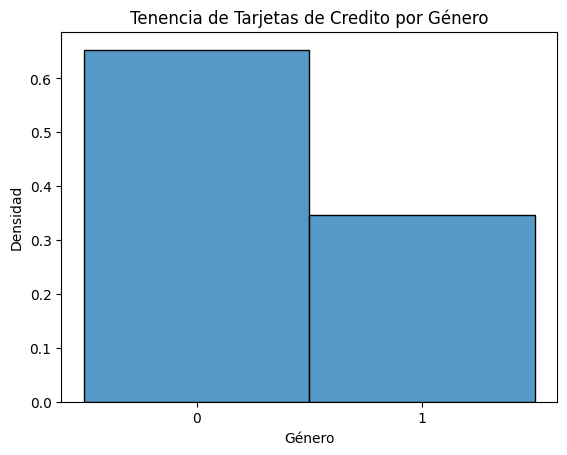

In [25]:
hist = sns.histplot(data=merge_persona_cliente, x="ID_GENERO",binwidth=1.0, discrete = True, stat = 'density')
hist.xaxis.set_major_locator(MaxNLocator(integer=True))
hist.set_xlabel("Género")
hist.set_ylabel("Densidad")
hist.set_title('Tenencia de Tarjetas de Credito por Género') 

In [26]:
clinetes_solo_nuevos = merge_persona_cliente[merge_persona_cliente['FLAG_NUEVO_CLTE'] == 1]
clinetes_solo_nuevos.describe()


,RENTA,EDAD,ID_GENERO,ID_CLIENTE_TENECIA,TARJ_CRE,FLAG_NUEVO_CLTE
count,1.540300e+04,22249.000000,22249.000000,2.225300e+04,22253.0,22253.0
mean,1.293290e+05,43.060587,0.389456,1.315723e+06,1.0,1.0
std,1.385967e+05,10.841314,0.487638,2.872593e+05,0.0,0.0
min,2.635074e+04,20.000000,0.000000,4.978300e+04,1.0,1.0
25%,6.727596e+04,36.000000,0.000000,1.383641e+06,1.0,1.0
50%,1.002096e+05,42.000000,0.000000,1.392846e+06,1.0,1.0
75%,1.463859e+05,50.000000,1.000000,1.423627e+06,1.0,1.0
max,3.045716e+06,87.000000,1.000000,1.545175e+06,1.0,1.0


Text(0.5, 1.0, 'Tenencia de Tarjetas de Credito de Nuevos Clientes por Edad')

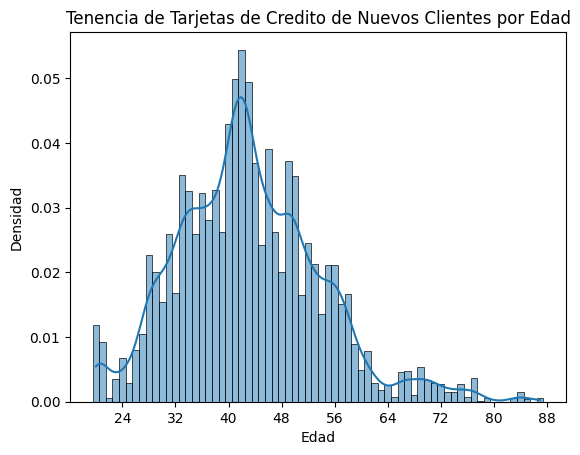

In [27]:
from matplotlib.ticker import MaxNLocator
hist = sns.histplot(data=clinetes_solo_nuevos, x="EDAD", discrete = True, stat = 'density', kde=True)
hist.xaxis.set_major_locator(MaxNLocator(integer=True))
hist.set_xlabel("Edad")
hist.set_ylabel("Densidad")
hist.set_title('Tenencia de Tarjetas de Credito de Nuevos Clientes por Edad') 

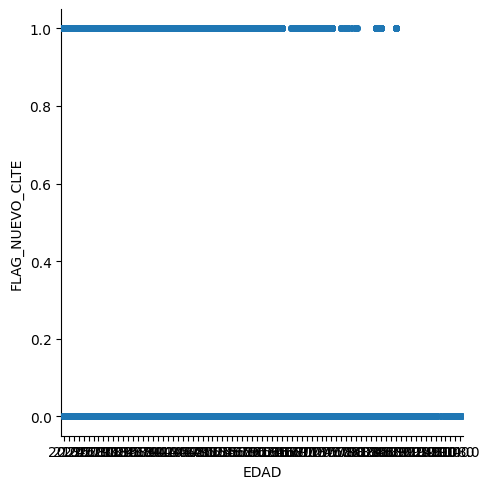

In [28]:
q_low =merge_persona_cliente["RENTA"].quantile(0.01)
q_hi  = merge_persona_cliente["RENTA"].quantile(0.99)
data_filtered = merge_persona_cliente[(merge_persona_cliente["RENTA"] < q_hi) & (merge_persona_cliente["RENTA"] > q_low)]

sns.catplot(data = data_filtered, x='EDAD', y='FLAG_NUEVO_CLTE')

Text(0.5, 1.0, 'Tenencia de Tarjetas de Credito por Género para Clientes Nuevos')

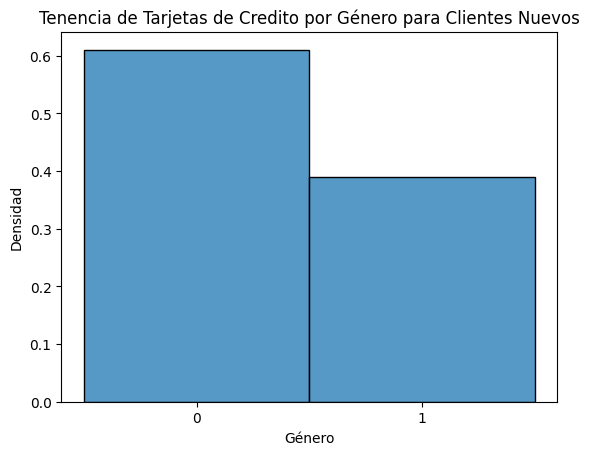

In [29]:
hist = sns.histplot(data=clinetes_solo_nuevos, x="ID_GENERO",binwidth=1.0, discrete = True, stat = 'density')
hist.xaxis.set_major_locator(MaxNLocator(integer=True))
hist.set_xlabel("Género")
hist.set_ylabel("Densidad")
hist.set_title('Tenencia de Tarjetas de Credito por Género para Clientes Nuevos')

In [30]:
##import sklearn.preprocessing
preaprobados = pd.read_csv('Data/BNK_FCT_PREAPROBADO.csv', sep = ";")

preaprobados

,ID_CLIENTE,FECHA_DATO,FLAG_PREAP,ID_PROD,FECHA_PROCESO
0,1375586,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
1,1050612,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
2,1050613,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
3,1050614,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
4,1050615,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
...,...,...,...,...,...
11763650,1166765,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41
11763651,1166764,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41
11763652,1166763,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41
11763653,1166789,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41


In [31]:
merge_preaprobados_tenencias = pd.merge(merge_persona_cliente, preaprobados, left_on='ID_CLIENTE_TENECIA', right_on='ID_CLIENTE', how='right').drop('ID_CLIENTE', axis=1)
merge_preaprobados_tenencias['FLAG_NUEVO_CLTE'] = merge_preaprobados_tenencias['FLAG_NUEVO_CLTE'].fillna(0)
#merge_persona_cliente['RENTA'] = merge_persona_cliente['RENTA'].dropna()
merge_preaprobados_tenencias = merge_preaprobados_tenencias.dropna()
merge_preaprobados_tenencias

,RENTA,EDAD,ID_GENERO,ID_CLIENTE_TENECIA,TARJ_CRE,FECHA_DATO_TENENCIA,FECHA_PROCESO_TENENCIA,FLAG_NUEVO_CLTE,FECHA_DATO,FLAG_PREAP,ID_PROD,FECHA_PROCESO
201,50229.09,30.0,1.0,1050911.0,1.0,2015-01-28 00:00:00,2015-01-27 23:39:20,0.0,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
202,50229.09,30.0,1.0,1050911.0,1.0,2015-02-28 00:00:00,2015-02-27 21:59:49,0.0,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
203,50229.09,30.0,1.0,1050911.0,1.0,2015-03-28 00:00:00,2015-03-27 21:36:59,0.0,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
204,50229.09,30.0,1.0,1050911.0,1.0,2015-04-28 00:00:00,2015-04-27 22:40:59,0.0,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
205,50229.09,30.0,1.0,1050911.0,1.0,2015-05-28 00:00:00,2015-05-27 23:39:02,0.0,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
...,...,...,...,...,...,...,...,...,...,...,...,...
21200436,52423.38,35.0,1.0,1167081.0,1.0,2015-12-28 00:00:00,2015-12-27 23:57:51,0.0,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41
21200437,52423.38,35.0,1.0,1167081.0,1.0,2016-02-28 00:00:00,2016-02-27 22:32:15,0.0,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41
21200438,52423.38,35.0,1.0,1167081.0,1.0,2016-03-28 00:00:00,2016-03-27 21:57:19,0.0,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41
21200439,52423.38,35.0,1.0,1167081.0,1.0,2016-04-28 00:00:00,2016-04-27 22:50:49,0.0,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41


In [32]:
merge_preaprobados_tenencias_nuevos = merge_preaprobados_tenencias[merge_preaprobados_tenencias['FLAG_NUEVO_CLTE'] == 1]
merge_preaprobados_tenencias_nuevos = merge_preaprobados_tenencias[merge_preaprobados_tenencias['ID_CLIENTE_TENECIA'] == 1157104.0]
merge_preaprobados_tenencias_nuevos.drop_duplicates()

,RENTA,EDAD,ID_GENERO,ID_CLIENTE_TENECIA,TARJ_CRE,FECHA_DATO_TENENCIA,FECHA_PROCESO_TENENCIA,FLAG_NUEVO_CLTE,FECHA_DATO,FLAG_PREAP,ID_PROD,FECHA_PROCESO
4075953,35296.26,49.0,1.0,1157104.0,1.0,2015-07-28 00:00:00,2015-07-27 22:30:52,1.0,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
4075959,35296.26,49.0,1.0,1157104.0,1.0,2015-08-28 00:00:00,2015-08-27 21:35:22,1.0,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
4075965,35296.26,49.0,1.0,1157104.0,1.0,2015-09-28 00:00:00,2015-09-27 22:35:28,1.0,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
4075971,35296.26,49.0,1.0,1157104.0,1.0,2015-10-28 00:00:00,2015-10-27 21:54:38,1.0,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
4075977,35296.26,49.0,1.0,1157104.0,1.0,2015-11-28 00:00:00,2015-11-27 22:53:35,1.0,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
...,...,...,...,...,...,...,...,...,...,...,...,...
21190762,35296.26,49.0,1.0,1157104.0,1.0,2016-01-28 00:00:00,2016-01-27 21:57:24,1.0,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41
21190768,35296.26,49.0,1.0,1157104.0,1.0,2016-02-28 00:00:00,2016-02-27 22:32:15,1.0,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41
21190774,35296.26,49.0,1.0,1157104.0,1.0,2016-03-28 00:00:00,2016-03-27 21:57:19,1.0,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41
21190780,35296.26,49.0,1.0,1157104.0,1.0,2016-04-28 00:00:00,2016-04-27 22:50:49,1.0,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41


In [33]:
preaprobados042015 = preaprobados[preaprobados['FECHA_DATO']== '2015-04-28']
preaprobados042015 = preaprobados042015.drop_duplicates()
preaprobados042015

,ID_CLIENTE,FECHA_DATO,FLAG_PREAP,ID_PROD,FECHA_PROCESO
1649117,15889,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
1649118,1394803,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
1649119,545148,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
1649120,545146,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
1649121,545142,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
...,...,...,...,...,...
2203313,1059300,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
2203314,1059303,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
2203315,1059301,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31
2203316,1059292,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31


In [34]:
clientes_credito_tenencia = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia = clientes_credito_tenencia[(clientes_credito_tenencia["FECHA_DATO_TENENCIA"] == "2015-04-28 00:00:00") | (clientes_credito_tenencia["FECHA_DATO_TENENCIA"] == "2015-05-28 00:00:00")]
clientes_credito_tenencia

,ID_CLIENTE_TENECIA,TARJ_CRE,FECHA_DATO_TENENCIA,FECHA_PROCESO_TENENCIA,FLAG_NUEVO_CLTE
105083,545106,1,2015-04-28 00:00:00,2015-04-27 22:40:59,0.0
105084,545216,1,2015-04-28 00:00:00,2015-04-27 22:40:59,0.0
105085,545182,1,2015-04-28 00:00:00,2015-04-27 22:40:59,0.0
105086,545100,1,2015-04-28 00:00:00,2015-04-27 22:40:59,0.0
105087,545040,1,2015-04-28 00:00:00,2015-04-27 22:40:59,0.0
...,...,...,...,...,...
177333,867517,1,2015-05-28 00:00:00,2015-05-27 23:39:02,0.0
177334,867522,1,2015-05-28 00:00:00,2015-05-27 23:39:02,0.0
177335,867523,1,2015-05-28 00:00:00,2015-05-27 23:39:02,0.0
177336,867525,1,2015-05-28 00:00:00,2015-05-27 23:39:02,0.0


In [35]:
clientes_credito_tenencia["TARJ_CRE"].sum()

72255

In [36]:
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados042015, clientes_credito_tenencia, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]

,ID_CLIENTE,FECHA_DATO,FLAG_PREAP,ID_PROD,FECHA_PROCESO,TARJ_CRE,FECHA_DATO_TENENCIA,FECHA_PROCESO_TENENCIA,FLAG_NUEVO_CLTE
0,15889,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31,1.0,2015-05-28 00:00:00,2015-05-27 23:39:02,0.0
16,545106,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31,1.0,2015-04-28 00:00:00,2015-04-27 22:40:59,0.0
17,545106,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31,1.0,2015-05-28 00:00:00,2015-05-27 23:39:02,0.0
23,545216,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31,1.0,2015-04-28 00:00:00,2015-04-27 22:40:59,0.0
24,545216,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31,1.0,2015-05-28 00:00:00,2015-05-27 23:39:02,0.0
...,...,...,...,...,...,...,...,...,...
586064,1059131,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31,1.0,2015-04-28 00:00:00,2015-04-27 22:40:59,0.0
586065,1059131,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31,1.0,2015-05-28 00:00:00,2015-05-27 23:39:02,0.0
586067,1059127,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31,1.0,2015-04-28 00:00:00,2015-04-27 22:40:59,0.0
586068,1059127,2015-04-28,Y,TARJ_CRE,2015-04-27 23:58:31,1.0,2015-05-28 00:00:00,2015-05-27 23:39:02,0.0


In [37]:
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones042015 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones042015

,ID_CLIENTE,counts
31587,106062,1
31588,1270887,1
31589,913738,1
31590,183814,1
31591,298129,1
...,...,...
39858,110921,1
39859,413028,1
39860,402793,1
39861,179578,1


In [38]:
preaprobados012015 = preaprobados[preaprobados['FECHA_DATO']== '2015-01-28']
preaprobados012015 = preaprobados012015.drop_duplicates()
preaprobados012015
clientes_credito_tenencia012015 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia012015 = clientes_credito_tenencia012015[(clientes_credito_tenencia012015["FECHA_DATO_TENENCIA"] == "2015-01-28 00:00:00") | (clientes_credito_tenencia012015["FECHA_DATO_TENENCIA"] == "2015-02-28 00:00:00")]
clientes_credito_tenencia012015
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados012015, clientes_credito_tenencia012015, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones012015 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones012015

,ID_CLIENTE,counts
30609,309420,1
30610,138878,1
30611,499659,1
30612,17796,1
30613,468253,1
...,...,...
38805,171037,1
38806,916562,1
38807,28678,1
38808,576535,1


In [39]:
preaprobados022015 = preaprobados[preaprobados['FECHA_DATO']== '2015-02-28']
preaprobados022015 = preaprobados022015.drop_duplicates()
preaprobados022015
clientes_credito_tenencia022015 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia022015 = clientes_credito_tenencia022015[(clientes_credito_tenencia022015["FECHA_DATO_TENENCIA"] == "2015-02-28 00:00:00") | (clientes_credito_tenencia022015["FECHA_DATO_TENENCIA"] == "2015-03-28 00:00:00")]
clientes_credito_tenencia022015
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados022015, clientes_credito_tenencia022015, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones022015 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones022015

,ID_CLIENTE,counts
29667,561122,1
29668,49358,1
29669,882647,1
29670,80914,1
29671,451808,1
...,...,...
39161,430128,1
39162,80032,1
39163,258140,1
39164,1016636,1


In [40]:
preaprobados032015 = preaprobados[preaprobados['FECHA_DATO']== '2015-03-28']
preaprobados032015 = preaprobados032015.drop_duplicates()
preaprobados032015
clientes_credito_tenencia032015 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia032015 = clientes_credito_tenencia032015[(clientes_credito_tenencia032015["FECHA_DATO_TENENCIA"] == "2015-03-28 00:00:00") | (clientes_credito_tenencia032015["FECHA_DATO_TENENCIA"] == "2015-04-28 00:00:00")]
clientes_credito_tenencia032015
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados032015, clientes_credito_tenencia032015, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones032015 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones032015

,ID_CLIENTE,counts
31133,880216,1
31134,67286,1
31135,1016847,1
31136,175636,1
31137,94697,1
...,...,...
39393,175544,1
39394,1015234,1
39395,488899,1
39396,116181,1


In [41]:
preaprobados052015 = preaprobados[preaprobados['FECHA_DATO']== '2015-05-28']
preaprobados052015 = preaprobados052015.drop_duplicates()
preaprobados052015
clientes_credito_tenencia052015 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia052015 = clientes_credito_tenencia052015[(clientes_credito_tenencia052015["FECHA_DATO_TENENCIA"] == "2015-05-28 00:00:00") | (clientes_credito_tenencia052015["FECHA_DATO_TENENCIA"] == "2015-06-28 00:00:00")]
clientes_credito_tenencia052015
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados052015, clientes_credito_tenencia052015, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones052015 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones052015

,ID_CLIENTE,counts
31775,723224,1
31776,136120,1
31777,878682,1
31778,483507,1
31779,1247967,1
...,...,...
40366,316088,1
40367,219849,1
40368,234192,1
40369,1299160,1


In [42]:
preaprobados062015 = preaprobados[preaprobados['FECHA_DATO']== '2015-06-28']
preaprobados062015 = preaprobados062015.drop_duplicates()
preaprobados062015
clientes_credito_tenencia062015 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia062015 = clientes_credito_tenencia062015[(clientes_credito_tenencia062015["FECHA_DATO_TENENCIA"] == "2015-06-28 00:00:00") | (clientes_credito_tenencia062015["FECHA_DATO_TENENCIA"] == "2015-07-28 00:00:00")]
clientes_credito_tenencia062015
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados062015, clientes_credito_tenencia062015, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones062015 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones062015

,ID_CLIENTE,counts
31871,154580,1
31872,771393,1
31873,194558,1
31874,228336,1
31875,38341,1
...,...,...
40966,728246,1
40967,447248,1
40968,270048,1
40969,110294,1


In [43]:
preaprobados072015 = preaprobados[preaprobados['FECHA_DATO']== '2015-07-28']
preaprobados072015 = preaprobados072015.drop_duplicates()
preaprobados072015
clientes_credito_tenencia072015 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia072015 = clientes_credito_tenencia072015[(clientes_credito_tenencia072015["FECHA_DATO_TENENCIA"] == "2015-07-28 00:00:00") | (clientes_credito_tenencia072015["FECHA_DATO_TENENCIA"] == "2015-08-28 00:00:00")]
clientes_credito_tenencia072015
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados072015, clientes_credito_tenencia072015, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones072015 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones072015

,ID_CLIENTE,counts
32474,377376,1
32475,797178,1
32476,664478,1
32477,554550,1
32478,140860,1
...,...,...
41438,169696,1
41439,583929,1
41440,645681,1
41441,559349,1


In [44]:
preaprobados082015 = preaprobados[preaprobados['FECHA_DATO']== '2015-08-28']
preaprobados082015 = preaprobados082015.drop_duplicates()
preaprobados082015
clientes_credito_tenencia082015 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia082015 = clientes_credito_tenencia082015[(clientes_credito_tenencia082015["FECHA_DATO_TENENCIA"] == "2015-08-28 00:00:00") | (clientes_credito_tenencia082015["FECHA_DATO_TENENCIA"] == "2015-09-28 00:00:00")]
clientes_credito_tenencia082015
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados082015, clientes_credito_tenencia082015, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones082015 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones082015

,ID_CLIENTE,counts
31847,649953,1
31848,489396,1
31849,81528,1
31850,71677,1
31851,290723,1
...,...,...
41188,533134,1
41189,541314,1
41190,110294,1
41191,637565,1


In [45]:
preaprobados092015 = preaprobados[preaprobados['FECHA_DATO']== '2015-09-28']
preaprobados092015 = preaprobados092015.drop_duplicates()
preaprobados092015
clientes_credito_tenencia092015 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia092015 = clientes_credito_tenencia092015[(clientes_credito_tenencia092015["FECHA_DATO_TENENCIA"] == "2015-09-28 00:00:00") | (clientes_credito_tenencia092015["FECHA_DATO_TENENCIA"] == "2015-10-28 00:00:00")]
clientes_credito_tenencia092015
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados092015, clientes_credito_tenencia092015, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones092015 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones092015

,ID_CLIENTE,counts
31679,336580,1
31680,571855,1
31681,136966,1
31682,524760,1
31683,325185,1
...,...,...
40605,938560,1
40606,109119,1
40607,1284665,1
40608,540908,1


In [46]:
preaprobados102015 = preaprobados[preaprobados['FECHA_DATO']== '2015-10-28']
preaprobados102015 = preaprobados102015.drop_duplicates()
preaprobados102015
clientes_credito_tenencia102015 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia102015 = clientes_credito_tenencia102015[(clientes_credito_tenencia102015["FECHA_DATO_TENENCIA"] == "2015-10-28 00:00:00") | (clientes_credito_tenencia102015["FECHA_DATO_TENENCIA"] == "2015-11-28 00:00:00")]
clientes_credito_tenencia102015
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados102015, clientes_credito_tenencia102015, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones102015 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones102015

,ID_CLIENTE,counts
32039,251264,1
32040,368452,1
32041,186208,1
32042,523840,1
32043,1262738,1
...,...,...
40275,838522,1
40276,103313,1
40277,402343,1
40278,293804,1


In [47]:
preaprobados112015 = preaprobados[preaprobados['FECHA_DATO']== '2015-11-28']
preaprobados112015 = preaprobados112015.drop_duplicates()
preaprobados112015
clientes_credito_tenencia112015 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia112015 = clientes_credito_tenencia112015[(clientes_credito_tenencia112015["FECHA_DATO_TENENCIA"] == "2015-11-28 00:00:00") | (clientes_credito_tenencia112015["FECHA_DATO_TENENCIA"] == "2015-12-28 00:00:00")]
clientes_credito_tenencia112015
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados112015, clientes_credito_tenencia112015, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones112015 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones112015

,ID_CLIENTE,counts
31985,431252,1
31986,307170,1
31987,225707,1
31988,303569,1
31989,17576,1
...,...,...
40464,598295,1
40465,479513,1
40466,437425,1
40467,1346443,1


In [48]:
preaprobados122015 = preaprobados[preaprobados['FECHA_DATO']== '2015-12-28']
preaprobados122015 = preaprobados122015.drop_duplicates()
preaprobados122015
clientes_credito_tenencia122015 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia122015 = clientes_credito_tenencia122015[(clientes_credito_tenencia122015["FECHA_DATO_TENENCIA"] == "2015-12-28 00:00:00") | (clientes_credito_tenencia122015["FECHA_DATO_TENENCIA"] == "2016-01-28 00:00:00")]
clientes_credito_tenencia122015
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados122015, clientes_credito_tenencia122015, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones122015 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones122015

,ID_CLIENTE,counts
31638,1013547,1
31639,519077,1
31640,164905,1
31641,858203,1
31642,427822,1
...,...,...
39896,642013,1
39897,371135,1
39898,323080,1
39899,58889,1


In [49]:
preaprobados012016 = preaprobados[preaprobados['FECHA_DATO']== '2016-01-28']
preaprobados012016 = preaprobados012016.drop_duplicates()
preaprobados012016
clientes_credito_tenencia012016 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia012016 = clientes_credito_tenencia012016[(clientes_credito_tenencia012016["FECHA_DATO_TENENCIA"] == "2016-01-28 00:00:00") | (clientes_credito_tenencia012016["FECHA_DATO_TENENCIA"] == "2016-02-28 00:00:00")]
clientes_credito_tenencia012016
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados012016, clientes_credito_tenencia012016, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones012016 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones012016

,ID_CLIENTE,counts
30639,422484,1
30640,870999,1
30641,1221544,1
30642,615312,1
30643,1008343,1
...,...,...
39119,482878,1
39120,505860,1
39121,415080,1
39122,204823,1


In [50]:
preaprobados022016 = preaprobados[preaprobados['FECHA_DATO']== '2016-02-28']
preaprobados022016 = preaprobados022016.drop_duplicates()
preaprobados022016
clientes_credito_tenencia022016 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia022016 = clientes_credito_tenencia022016[(clientes_credito_tenencia022016["FECHA_DATO_TENENCIA"] == "2016-02-28 00:00:00") | (clientes_credito_tenencia022016["FECHA_DATO_TENENCIA"] == "2016-03-28 00:00:00")]
clientes_credito_tenencia022016
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados022016, clientes_credito_tenencia022016, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones022016 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones022016

,ID_CLIENTE,counts
30086,67825,1
30087,121897,1
30088,432663,1
30089,269308,1
30090,758811,1
...,...,...
38703,82720,1
38704,1069488,1
38705,212133,1
38706,1143590,1


In [51]:
preaprobados032016 = preaprobados[preaprobados['FECHA_DATO']== '2016-03-28']
preaprobados032016 = preaprobados032016.drop_duplicates()
preaprobados032016
clientes_credito_tenencia032016 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia032016 = clientes_credito_tenencia032016[(clientes_credito_tenencia032016["FECHA_DATO_TENENCIA"] == "2016-03-28 00:00:00") | (clientes_credito_tenencia032016["FECHA_DATO_TENENCIA"] == "2016-04-28 00:00:00")]
clientes_credito_tenencia032016
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados032016, clientes_credito_tenencia032016, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones032016 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones032016

,ID_CLIENTE,counts
30866,656415,1
30867,815797,1
30868,821752,1
30869,40668,1
30870,272798,1
...,...,...
38338,117742,1
38339,119789,1
38340,358357,1
38341,578132,1


In [52]:
preaprobados042016 = preaprobados[preaprobados['FECHA_DATO']== '2016-04-28']
preaprobados042016 = preaprobados042016.drop_duplicates()
preaprobados042016
clientes_credito_tenencia042016 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia042016 = clientes_credito_tenencia042016[(clientes_credito_tenencia042016["FECHA_DATO_TENENCIA"] == "2016-04-28 00:00:00") | (clientes_credito_tenencia042016["FECHA_DATO_TENENCIA"] == "2016-05-28 00:00:00")]
clientes_credito_tenencia042016
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados042016, clientes_credito_tenencia042016, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones042016 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones042016

,ID_CLIENTE,counts
30760,272444,1
30761,1019188,1
30762,780728,1
30763,210395,1
30764,108495,1
...,...,...
38951,142248,1
38952,521968,1
38953,57425,1
38954,1134311,1


In [53]:
preaprobados052016 = preaprobados[preaprobados['FECHA_DATO']== '2016-05-28']
preaprobados052016 = preaprobados052016.drop_duplicates()
preaprobados052016
clientes_credito_tenencia052016 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia052016 = clientes_credito_tenencia052016[(clientes_credito_tenencia052016["FECHA_DATO_TENENCIA"] == "2016-05-28 00:00:00") | (clientes_credito_tenencia052016["FECHA_DATO_TENENCIA"] == "2016-06-28 00:00:00")]
clientes_credito_tenencia052016
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados052016, clientes_credito_tenencia052016, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones052016 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones052016

,ID_CLIENTE,counts
655,695366,1
656,314729,1
657,196108,1
658,59976,1
659,742399,1
...,...,...
34759,452214,1
34760,1019036,1
34761,456308,1
34762,52851,1


In [54]:
preaprobados062016 = preaprobados[preaprobados['FECHA_DATO']== '2016-06-28']
preaprobados062016 = preaprobados062016.drop_duplicates()
preaprobados062016
clientes_credito_tenencia062016 = cliente_credito_nuevos.fillna(0)
clientes_credito_tenencia062016 = clientes_credito_tenencia062016[(clientes_credito_tenencia062016["FECHA_DATO_TENENCIA"] == "2016-06-28 00:00:00") | (clientes_credito_tenencia062016["FECHA_DATO_TENENCIA"] == "2016-07-28 00:00:00")]
clientes_credito_tenencia062016
merge_cliente_tenencia_preaprobado = pd.merge(preaprobados062016, clientes_credito_tenencia062016, left_on='ID_CLIENTE', right_on='ID_CLIENTE_TENECIA', how='left').drop('ID_CLIENTE_TENECIA', axis=1)
merge_cliente_tenencia_preaprobado = merge_cliente_tenencia_preaprobado.fillna(0)
cantidad_de_apariciones = merge_cliente_tenencia_preaprobado[merge_cliente_tenencia_preaprobado["TARJ_CRE"] == 1]
cantidad_de_apariciones = cantidad_de_apariciones["ID_CLIENTE"].value_counts()
cantidad_de_apariciones = cantidad_de_apariciones.rename_axis('ID_CLIENTE').reset_index(name ="counts")
cantidad_de_apariciones062016 = cantidad_de_apariciones [cantidad_de_apariciones["counts"] == 1]
cantidad_de_apariciones062016


,ID_CLIENTE,counts


In [55]:
personas_aceptaron_preaprobacion = pd.concat([cantidad_de_apariciones042015, cantidad_de_apariciones052015, cantidad_de_apariciones062015, cantidad_de_apariciones072015, cantidad_de_apariciones082015, cantidad_de_apariciones092015, cantidad_de_apariciones102015, cantidad_de_apariciones112015, cantidad_de_apariciones122015,
           cantidad_de_apariciones012016, cantidad_de_apariciones022016, cantidad_de_apariciones032016, cantidad_de_apariciones042016, cantidad_de_apariciones052016])
personas_aceptaron_preaprobacion = personas_aceptaron_preaprobacion.rename(columns={"ID_CLIENTE":"ID_CLIENTES"})
personas_aceptaron_preaprobacion


,ID_CLIENTES,counts
31587,106062,1
31588,1270887,1
31589,913738,1
31590,183814,1
31591,298129,1
...,...,...
34759,452214,1
34760,1019036,1
34761,456308,1
34762,52851,1


In [56]:
preaprobados

,ID_CLIENTE,FECHA_DATO,FLAG_PREAP,ID_PROD,FECHA_PROCESO
0,1375586,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
1,1050612,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
2,1050613,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
3,1050614,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
4,1050615,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52
...,...,...,...,...,...
11763650,1166765,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41
11763651,1166764,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41
11763652,1166763,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41
11763653,1166789,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41


In [57]:
merge_cliente_tenencia_preaprobado_aceptaron = pd.merge(preaprobados, personas_aceptaron_preaprobacion, left_on='ID_CLIENTE', right_on='ID_CLIENTES', how='left').drop('ID_CLIENTES', axis=1)
merge_cliente_tenencia_preaprobado_aceptaron["counts"] = merge_cliente_tenencia_preaprobado_aceptaron['counts'].fillna(0)
merge_cliente_tenencia_preaprobado_aceptaron = merge_cliente_tenencia_preaprobado_aceptaron.dropna()
merge_cliente_tenencia_preaprobado_aceptaron = merge_cliente_tenencia_preaprobado_aceptaron.drop_duplicates()
merge_cliente_tenencia_preaprobado_aceptaron["ID_CLIENTE"] = merge_cliente_tenencia_preaprobado_aceptaron["ID_CLIENTE"].drop_duplicates()
merge_cliente_tenencia_preaprobado_aceptaron = merge_cliente_tenencia_preaprobado_aceptaron.dropna()
merge_cliente_tenencia_preaprobado_aceptaron

,ID_CLIENTE,FECHA_DATO,FLAG_PREAP,ID_PROD,FECHA_PROCESO,counts
0,1375586.0,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
1,1050612.0,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
2,1050613.0,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
3,1050614.0,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
4,1050615.0,2015-01-28,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
...,...,...,...,...,...,...
13262038,1185013.0,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41,0.0
13269647,1168909.0,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41,0.0
13270635,1173729.0,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41,0.0
13272890,1164094.0,2016-05-28,Y,TARJ_CRE,2016-05-27 22:36:41,0.0


In [58]:
merge_cliente_tenencia_preaprobado_aceptaron["ID_CLIENTE"].prod()

inf

In [59]:
merge_cliente_tenencia_preaprobado_aceptaron["counts"].sum()

55363.0

In [60]:
merge_cliente_tenencia_preaprobado_aceptaron = merge_cliente_tenencia_preaprobado_aceptaron.rename(columns={"ID_CLIENTE":"ID_CLIENTES"})

In [61]:
preaprobados_aceptaronsiono_masinfopersonas = pd.merge(personas_datos_importantes, merge_cliente_tenencia_preaprobado_aceptaron, left_on='ID_CLIENTE', right_on='ID_CLIENTES', how='right').drop('ID_CLIENTES', axis=1)
preaprobados_aceptaronsiono_masinfopersonas = preaprobados_aceptaronsiono_masinfopersonas.dropna()
preaprobados_aceptaronsiono_masinfopersonas['FECHA_DATO'] = preaprobados_aceptaronsiono_masinfopersonas['FECHA_DATO'] + " 00:00:00"
preaprobados_aceptaronsiono_masinfopersonas
#947454
#707129

,ID_CLIENTE,RENTA,EDAD,ID_GENERO,FECHA_DATO,FLAG_PREAP,ID_PROD,FECHA_PROCESO,counts
0,1375586.0,87218.10,36.0,1.0,2015-01-28 00:00:00,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
1,1050612.0,122179.11,23.0,0.0,2015-01-28 00:00:00,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
2,1050613.0,119775.54,23.0,1.0,2015-01-28 00:00:00,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
4,1050615.0,22220.04,24.0,1.0,2015-01-28 00:00:00,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
5,1050616.0,295590.36,24.0,1.0,2015-01-28 00:00:00,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
...,...,...,...,...,...,...,...,...,...
931965,1441442.0,168445.62,34.0,0.0,2016-03-28 00:00:00,Y,TARJ_CRE,2016-03-27 21:49:46,0.0
931973,1454431.0,53689.02,24.0,1.0,2016-03-28 00:00:00,Y,TARJ_CRE,2016-03-27 21:49:46,0.0
932615,56812.0,64404.21,61.0,0.0,2016-03-28 00:00:00,Y,TARJ_CRE,2016-03-27 21:49:46,0.0
937858,909757.0,292325.85,66.0,0.0,2016-03-28 00:00:00,Y,TARJ_CRE,2016-03-27 21:49:46,0.0


In [62]:
clientes_datos_importantes = clientes.filter(['ID_CLIENTE','ID_EMPLEADO','ID_SEGMENTO_VALOR','FECHA_DATO', 'ANTIGUEDAD'])
clientes_datos_importantes["ID_EMPLEADO"] = clientes_datos_importantes["ID_EMPLEADO"].replace({"NOEMP": 0, "EXEMP": 0, "SUBSI": 0, "INACT": 0, "ACTIV": 1})
clientes_datos_importantes = clientes_datos_importantes.drop_duplicates()
clientes_datos_importantes = clientes_datos_importantes.rename(columns={"ID_CLIENTE":"ID_CLIENTES"})
clientes_datos_importantes

,ID_CLIENTES,ID_EMPLEADO,ID_SEGMENTO_VALOR,FECHA_DATO,ANTIGUEDAD
0,1375586,0,2,2015-01-28 00:00:00,6.0
1,1050611,0,3,2015-01-28 00:00:00,35.0
2,1050612,0,3,2015-01-28 00:00:00,35.0
3,1050613,0,3,2015-01-28 00:00:00,35.0
4,1050614,0,3,2015-01-28 00:00:00,35.0
...,...,...,...,...,...
13647303,1166766,0,3,2016-05-28 00:00:00,33.0
13647304,1166765,0,3,2016-05-28 00:00:00,33.0
13647305,1166764,0,3,2016-05-28 00:00:00,33.0
13647306,1166763,0,2,2016-05-28 00:00:00,33.0


In [63]:
preaprobados_aceptaronsiono_masinfopersonas_mascliente = pd.merge(clientes_datos_importantes, preaprobados_aceptaronsiono_masinfopersonas, left_on=['ID_CLIENTES','FECHA_DATO'], right_on=['ID_CLIENTE','FECHA_DATO'], how='right').drop('ID_CLIENTES', axis=1)
preaprobados_aceptaronsiono_masinfopersonas_mascliente.dropna(inplace = True)
preaprobados_aceptaronsiono_masinfopersonas_mascliente

,ID_EMPLEADO,ID_SEGMENTO_VALOR,FECHA_DATO,ANTIGUEDAD,ID_CLIENTE,RENTA,EDAD,ID_GENERO,FLAG_PREAP,ID_PROD,FECHA_PROCESO,counts
0,0.0,2.0,2015-01-28 00:00:00,6.0,1375586.0,87218.10,36.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
1,0.0,3.0,2015-01-28 00:00:00,35.0,1050612.0,122179.11,23.0,0.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
2,0.0,3.0,2015-01-28 00:00:00,35.0,1050613.0,119775.54,23.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
3,0.0,3.0,2015-01-28 00:00:00,35.0,1050615.0,22220.04,24.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
4,0.0,3.0,2015-01-28 00:00:00,35.0,1050616.0,295590.36,24.0,1.0,Y,TARJ_CRE,2015-01-27 22:56:52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
707124,0.0,2.0,2016-03-28 00:00:00,7.0,1441442.0,168445.62,34.0,0.0,Y,TARJ_CRE,2016-03-27 21:49:46,0.0
707125,0.0,3.0,2016-03-28 00:00:00,6.0,1454431.0,53689.02,24.0,1.0,Y,TARJ_CRE,2016-03-27 21:49:46,0.0
707126,0.0,2.0,2016-03-28 00:00:00,229.0,56812.0,64404.21,61.0,0.0,Y,TARJ_CRE,2016-03-27 21:49:46,0.0
707127,0.0,2.0,2016-03-28 00:00:00,59.0,909757.0,292325.85,66.0,0.0,Y,TARJ_CRE,2016-03-27 21:49:46,0.0


Text(0.5, 1.0, 'Tenencia de Tarjetas de Credito de Nuevos Clientes por Edad')

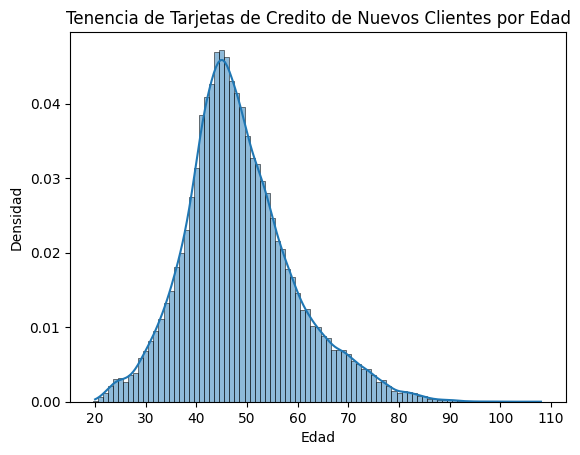

In [83]:
personas_que_aceptaron = preaprobados_aceptaronsiono_masinfopersonas_mascliente[preaprobados_aceptaronsiono_masinfopersonas_mascliente["counts"] == 1]

from matplotlib.ticker import MaxNLocator
hist = sns.histplot(data=personas_que_aceptaron, x="EDAD", discrete = True, stat = 'density', kde=True)
hist.xaxis.set_major_locator(MaxNLocator(integer=True))
hist.set_xlabel("Edad")
hist.set_ylabel("Densidad")
hist.set_title('Tenencia de Tarjetas de Credito de Nuevos Clientes por Edad') 

In [91]:
print("promedio")
print(personas_que_aceptaron["EDAD"].quantile(0.5))
print("55")
print(personas_que_aceptaron["EDAD"].quantile(0.55))
print("45")
print(personas_que_aceptaron["EDAD"].quantile(0.45))
print("")

print("60")
print(personas_que_aceptaron["EDAD"].quantile(0.6))
print("40")
print(personas_que_aceptaron["EDAD"].quantile(0.4))
print("")
print("70")
print(personas_que_aceptaron["EDAD"].quantile(0.7))
print("30")
print(personas_que_aceptaron["EDAD"].quantile(0.3))
print("")
print("80")
print(personas_que_aceptaron["EDAD"].quantile(0.8))
print("20")
print(personas_que_aceptaron["EDAD"].quantile(0.2))

promedio
47.0
55
48.0
45
46.0

60
50.0
40
45.0

70
53.0
30
43.0

80
56.0
20
40.0


In [64]:
tenencias = pd.read_csv('Data/BNK_FCT_TENENCIA.csv', sep = ";")
tenencia_clientes = tenencias.filter(['ID_CLIENTE','CT_CTE','DEBITO_DIR', 'FECHA_DATO'])
tenencia_clientes = tenencia_clientes.rename(columns={"ID_CLIENTE":"ID_CLIENTES"})
tenencia_clientes

,ID_CLIENTES,CT_CTE,DEBITO_DIR,FECHA_DATO
0,1375586,1,0,2015-01-28 00:00:00
1,1050611,1,0,2015-01-28 00:00:00
2,1050612,1,0,2015-01-28 00:00:00
3,1050613,0,0,2015-01-28 00:00:00
4,1050614,1,0,2015-01-28 00:00:00
...,...,...,...,...
13647304,1553685,0,0,2016-05-28 00:00:00
13647305,1553686,0,0,2016-05-28 00:00:00
13647306,1553687,0,0,2016-05-28 00:00:00
13647307,1553616,0,0,2016-05-28 00:00:00


In [76]:
preaprobados_aceptaronsiono_masinfopersonas_mascliente_mastenencias = pd.merge(tenencia_clientes, preaprobados_aceptaronsiono_masinfopersonas_mascliente, left_on=['ID_CLIENTES','FECHA_DATO'], right_on=['ID_CLIENTE','FECHA_DATO'], how='right').drop('ID_CLIENTES', axis=1)
preaprobados_aceptaronsiono_masinfopersonas_mascliente_mastenencias.drop_duplicates(inplace= True)
preaprobados_aceptaronsiono_masinfopersonas_mascliente_mastenencias.filter(['ID_CLIENTE', 'RENTA', 'EDAD', 'ID_GENERO', 'DEBITO_DIR', 'ID_SEGMENTO_VALOR'])

,ID_CLIENTE,RENTA,EDAD,ID_GENERO,DEBITO_DIR,ID_SEGMENTO_VALOR
0,1375586.0,87218.10,36.0,1.0,0,2.0
1,1050612.0,122179.11,23.0,0.0,0,3.0
2,1050613.0,119775.54,23.0,1.0,0,3.0
3,1050615.0,22220.04,24.0,1.0,0,3.0
4,1050616.0,295590.36,24.0,1.0,0,3.0
...,...,...,...,...,...,...
675200,1441442.0,168445.62,34.0,0.0,0,2.0
675201,1454431.0,53689.02,24.0,1.0,0,3.0
675202,56812.0,64404.21,61.0,0.0,0,2.0
675203,909757.0,292325.85,66.0,0.0,0,2.0


In [72]:
tenencia_clientes_importante = pd.merge(tenencia_clientes, clientes_datos_importantes, left_on=['ID_CLIENTES','FECHA_DATO'], right_on=['ID_CLIENTES','FECHA_DATO'], how='right')
tenencia_clientes_importante = tenencia_clientes_importante.drop_duplicates(subset = 'ID_CLIENTES')
tenencia_clientes_importante = tenencia_clientes_importante.filter(['ID_CLIENTES','DEBITO_DIR','ID_SEGMENTO_VALOR'])
tenencia_clientes_importante

,ID_CLIENTES,DEBITO_DIR,ID_SEGMENTO_VALOR
0,1375586,0,2
1,1050611,0,3
2,1050612,0,3
3,1050613,0,3
4,1050614,0,3
...,...,...,...
13430443,1178553,0,2
13435783,1176873,0,2
13442926,1185089,0,2
13451491,1171168,0,2


In [75]:
tenencia_clientes_personas_importante = pd.merge(personas_datos_importantes, tenencia_clientes_importante, left_on=['ID_CLIENTE'], right_on=['ID_CLIENTES'], how='right').drop('ID_CLIENTES', axis=1)
tenencia_clientes_personas_importante.dropna(inplace=True)
tenencia_clientes_personas_importante

,ID_CLIENTE,RENTA,EDAD,ID_GENERO,DEBITO_DIR,ID_SEGMENTO_VALOR
0,1375586.0,87218.10,36.0,1.0,0,2
1,1050611.0,35548.74,24.0,0.0,0,3
2,1050612.0,122179.11,23.0,0.0,0,3
3,1050613.0,119775.54,23.0,1.0,0,3
5,1050615.0,22220.04,24.0,1.0,0,3
...,...,...,...,...,...,...
928819,534023.0,189581.22,73.0,0.0,0,1
928834,482627.0,54215.22,43.0,0.0,1,2
933678,36049.0,139394.46,57.0,0.0,0,1
933700,223861.0,63902.46,46.0,0.0,0,2


In [80]:
ids = preaprobados_aceptaronsiono_masinfopersonas_mascliente_mastenencias['ID_CLIENTE'].unique()
ids_faltantes = set(ids) - set(tenencia_clientes_personas_importante['ID_CLIENTE'])
df_faltantes = pd.DataFrame({'id': list(ids_faltantes), 'valor': 0})
df_resultado = pd.concat([tenencia_clientes_personas_importante, df_faltantes], ignore_index=True)
df_resultado


,ID_CLIENTE,RENTA,EDAD,ID_GENERO,DEBITO_DIR,ID_SEGMENTO_VALOR,id,valor
0,1375586.0,87218.10,36.0,1.0,0.0,2.0,NaN,NaN
1,1050611.0,35548.74,24.0,0.0,0.0,3.0,NaN,NaN
2,1050612.0,122179.11,23.0,0.0,0.0,3.0,NaN,NaN
3,1050613.0,119775.54,23.0,1.0,0.0,3.0,NaN,NaN
4,1050615.0,22220.04,24.0,1.0,0.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...
705346,534023.0,189581.22,73.0,0.0,0.0,1.0,NaN,NaN
705347,482627.0,54215.22,43.0,0.0,1.0,2.0,NaN,NaN
705348,36049.0,139394.46,57.0,0.0,0.0,1.0,NaN,NaN
705349,223861.0,63902.46,46.0,0.0,0.0,2.0,NaN,NaN


In [81]:
clientes

,ID_CLIENTE,FECHA_DATO,FLAG_NUEVO_CLTE,ANTIGUEDAD,FLAG_ACTIVI,FLAG_ESTADO,ID_CODACCION,ID_ESTADO,ID_SEGMENTO_VALOR,ID_EMPLEADO
0,1375586,2015-01-28 00:00:00,0.0,6.0,1.0,1.0,1.0,0.0,2,NOEMP
1,1050611,2015-01-28 00:00:00,0.0,35.0,0.0,1.0,1.0,1.0,3,NOEMP
2,1050612,2015-01-28 00:00:00,0.0,35.0,0.0,1.0,1.0,1.0,3,NOEMP
3,1050613,2015-01-28 00:00:00,0.0,35.0,0.0,1.0,1.0,1.0,3,NOEMP
4,1050614,2015-01-28 00:00:00,0.0,35.0,1.0,1.0,1.0,0.0,3,NOEMP
...,...,...,...,...,...,...,...,...,...,...
13647303,1166766,2016-05-28 00:00:00,0.0,33.0,0.0,1.0,1,1.0,3,NOEMP
13647304,1166765,2016-05-28 00:00:00,0.0,33.0,0.0,1.0,1,1.0,3,NOEMP
13647305,1166764,2016-05-28 00:00:00,0.0,33.0,0.0,1.0,1,1.0,3,NOEMP
13647306,1166763,2016-05-28 00:00:00,0.0,33.0,1.0,1.0,1,0.0,2,NOEMP


In [ ]:
preaprobados_aceptaronsiono_masinfopersonas_mascliente_mastenencias.to_csv(r'C:\Users\marti\Desktop\Capstone\procesamiento de datos\Clientes_que_aceptaronono_massuinfo.csv', index=False, header=True)